In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
ci = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1], 
               [0, 0, 1, 0, -1, 1, 1, -1, -1]])

In [3]:
fi_exact = np.load("fi_exact.npy")
fi_2ndcarleman = np.load("fi_2nd carleman.npy")

In [4]:
fe1, fe2, fe3 = fi_exact[0], fi_exact[1], fi_exact[2]
fc1, fc2, fc3 = fi_2ndcarleman[0], fi_2ndcarleman[1], fi_2ndcarleman[2]

In [5]:
def get_macro_quantities(fi):
    rho = np.sum(fi, axis=2)  # Density
    ux = np.sum(fi * ci[0], 2) / rho
    uy = np.sum(fi * ci[1], 2) / rho
    
    return rho, ux, uy

In [6]:
def rmse(a, b):
    rmse = np.sqrt(np.mean(((a - b))**2)) # / a
    return rmse

def mae(a, b):
    error = np.mean(np.abs(a - b))
    return error

def ae_re(a, b):
    ae = np.abs(a - b)
    re = np.abs((a - b) / a)
    return ae, re

In [7]:
mae1s, ae1s, re1s = [], [], []
mae2s, ae2s, re2s = [], [], []
mae3s, ae3s, re3s = [], [], []

for t in range(100):
    # Compute macro velocity
    _, uxe1t, uye1t = get_macro_quantities(fe1[t])
    _, uxe2t, uye2t = get_macro_quantities(fe2[t])
    _, uxe3t, uye3t = get_macro_quantities(fe3[t])
    
    _, uxc1t, uyc1t = get_macro_quantities(fc1[t])
    _, uxc2t, uyc2t = get_macro_quantities(fc2[t])
    _, uxc3t, uyc3t = get_macro_quantities(fc3[t])
    
    # Error data calculation
    mae1 = mae(uxe1t, uxc1t)
    mae2 = mae(uxe2t, uxc2t)
    mae3 = mae(uxe3t, uxc3t)
    
    ae1, re1 = ae_re(uxe1t, uxc1t)
    ae2, re2 = ae_re(uxe2t, uxc2t)
    ae3, re3 = ae_re(uxe3t, uxc3t)
    
    # Error data storagement
    mae1s.append(mae1)
    mae2s.append(mae2)
    mae3s.append(mae3)
    
    ae1s.append(ae1)
    ae2s.append(ae2)
    ae3s.append(ae3)
    
    re1s.append(re1)
    re2s.append(re2)
    re3s.append(re3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9292\1963758478.py:11: RuntimeWarning: invalid value encountered in divide
  re = np.abs((a - b) / a)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9292\1963758478.py:11: RuntimeWarning: divide by zero encountered in divide
  re = np.abs((a - b) / a)


In [8]:
rmse1s = []
rmse2s = []
rmse3s = []

for t in range(100):
    rmse1 = 0.0
    rmse2 = 0.0
    rmse3 = 0.0
    
    for i in range(9):
        rmse1 += rmse(fe1[t, :, :, i], fc1[t, :, :, i]) / 9
        rmse2 += rmse(fe2[t, :, :, i], fc2[t, :, :, i]) / 9
        rmse3 += rmse(fe3[t, :, :, i], fc3[t, :, :, i]) / 9
        
    rmse1s.append(rmse1)
    rmse2s.append(rmse2)
    rmse3s.append(rmse3)

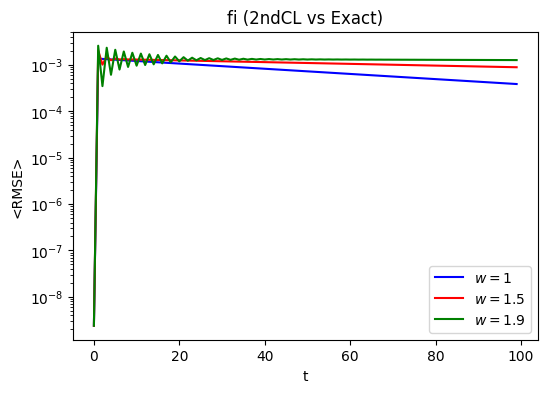

In [9]:
t = np.arange(100)

plt.figure(figsize=(6, 4))
plt.plot(t, rmse1s, label="$w = 1$", color="blue")
plt.plot(t, rmse2s, label="$w = 1.5$", color="red")
plt.plot(t, rmse3s, label="$w = 1.9$", color="green")
plt.yscale('log')
plt.xlabel("t")
plt.ylabel("<RMSE>")
plt.legend()
plt.title("fi (2ndCL vs Exact)")
plt.show()

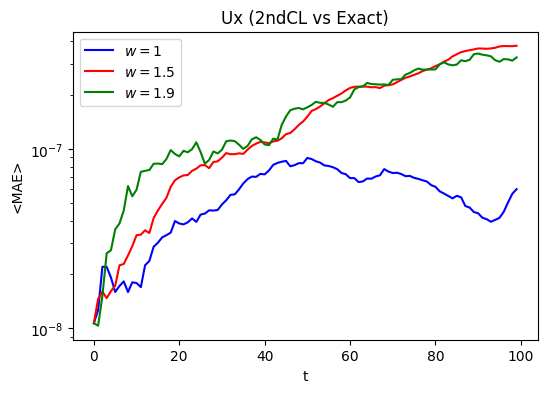

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(t, mae1s, label="$w = 1$", color="blue")
plt.plot(t, mae2s, label="$w = 1.5$", color="red")
plt.plot(t, mae3s, label="$w = 1.9$", color="green")
plt.yscale('log')
plt.xlabel("t")
plt.ylabel("<MAE>")
plt.legend()
plt.title("Ux (2ndCL vs Exact)")
plt.show()